# Introduction
Ce projet consiste à faire l'analyse de la taille du marché des véhicules électriques

# Importation des bibliothèques nécessaires

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Chargement du dataset

In [37]:
ev_dataset_path = r"C:\Users\moham\Desktop\Projet\DSProject\EV market analysis\EV-data\Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(ev_dataset_path)
print(df.head())

   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

# On va supprimer les lignes ayants des valeurs nulles

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [39]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [40]:
df = df.dropna(axis = 0)

# Analyse Exploratoire des données
Pour la tâche d'analyse de la taille du marché des véhicules électriques, nous pouvons explorer les domaines suivants:

- EV Adoption Au fil du temps
- Répartition Géographique
- EV Types
- Constructeur populaire

## Adoption des véhicules electriques au fil des années

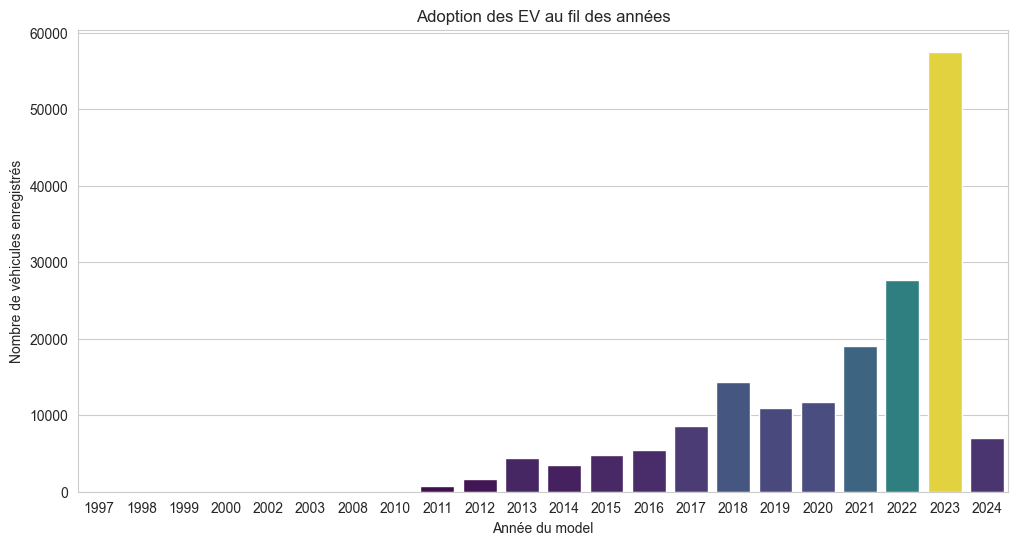

In [41]:
plt.figure(figsize = (12, 6))
ev_adoption = df["Model Year"].value_counts().sort_index()
sns.barplot(x = ev_adoption.index, y = ev_adoption.values, hue = ev_adoption, legend = False, palette = "viridis")
plt.title("Adoption des EV au fil des années")
plt.xlabel("Année du model")
plt.ylabel("Nombre de véhicules enregistrés")
plt.show()

## Répartition géographique
Maintenant, commençons par sélectionner les 3 premiers comtés en fonction des enregistrements de VE, puis analysez la distribution des VE dans les villes de ces comtés

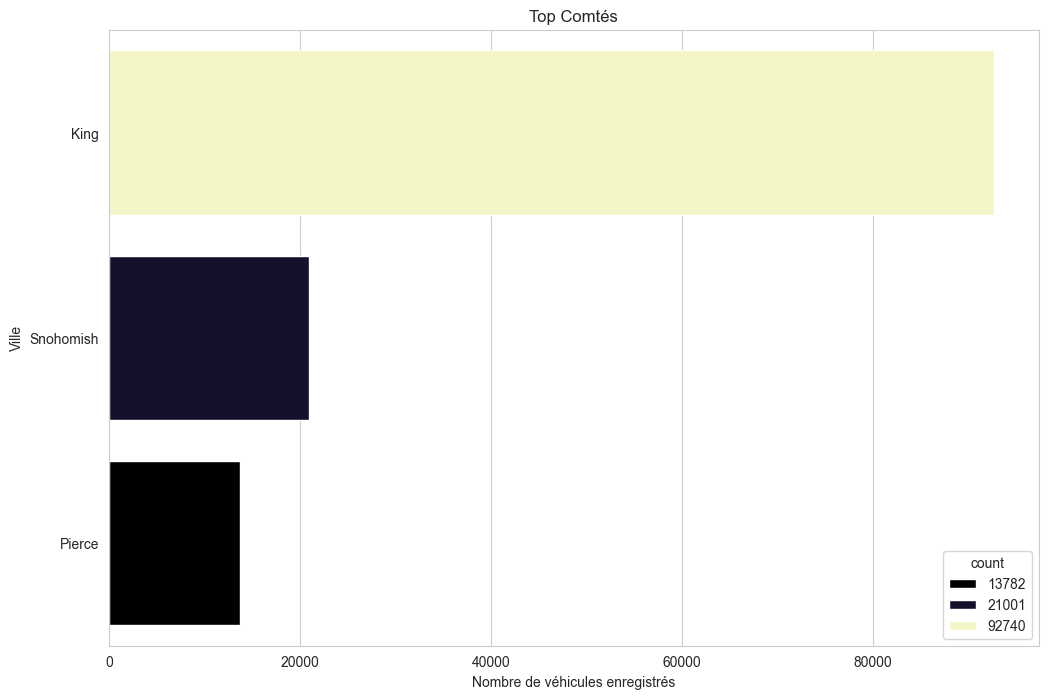

In [42]:
ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_counties.values, y=top_counties.index, hue=top_counties, palette="magma")
plt.title('Top 3 Comtés')
plt.xlabel('Nombre de véhicules enregistrés')
plt.ylabel('Comté')
plt.show()

## EV Types

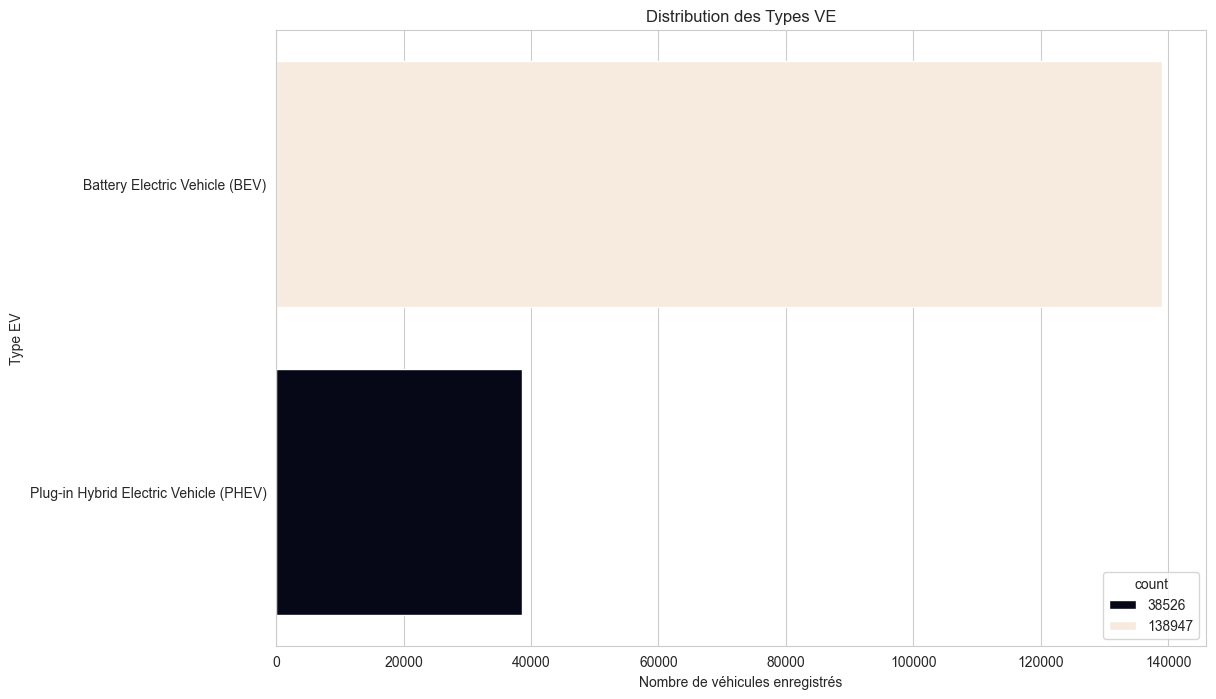

In [44]:
ev_types = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x = ev_types.values, y = ev_types.index, hue = ev_types, palette="rocket")
plt.title('Distribution des Types VE')
plt.xlabel('Nombre de véhicules enregistrés')
plt.ylabel('Type EV')
plt.show()

## Constructeur populaire

On va prendre uniquement les 10 meilleures fabriquants

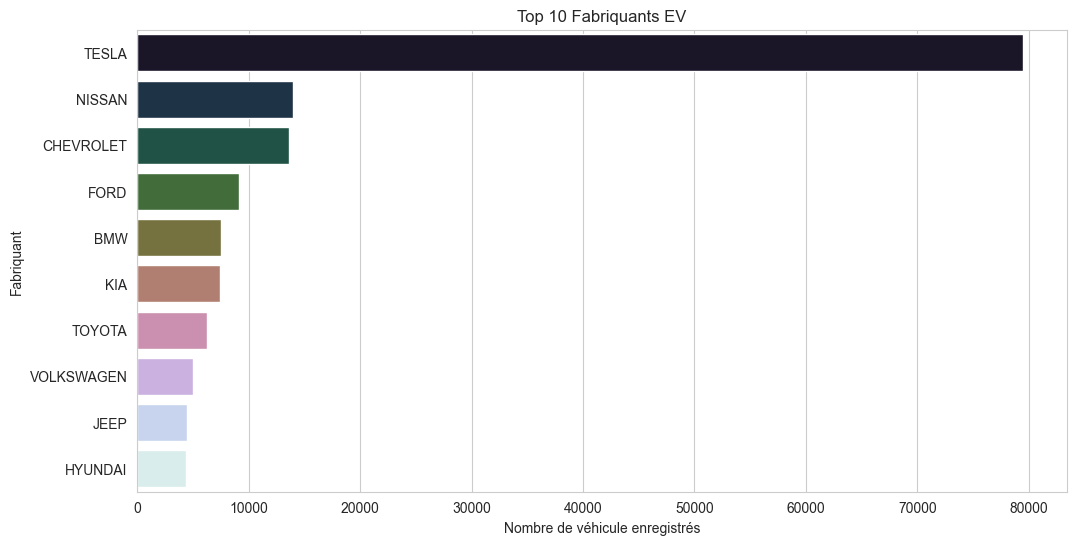

In [46]:
ev_make_distribution = df['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, hue = ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Fabriquants EV')
plt.xlabel('Nombre de véhicule enregistrés')
plt.ylabel('Fabriquant')
plt.show()